# Two variable curve fitting 

* independent variables: $\mathbf{x}=(x_1,x_2)$
  
* dependent variables: y
* 6 parameter model: $m(\mathbf{x},\mathbf p)=p_0x^2 + p_1x_1 x_2 + p_2x_2^2 + p_3x_1 + p_4x_2 + p_5 $

(100, 2)
EXACT PARAMETERS: [ 0.32292273 -1.65444175  1.14024359 -2.76103629  2.1807293  -0.15022766]


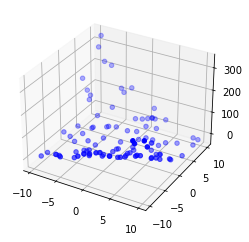

OPTIMAL PARAMETERS: [ 0.33909393 -1.65869991  1.13848228 -2.86789353  2.12194875  5.26714895]


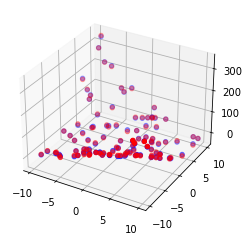

PARITY PLOT:


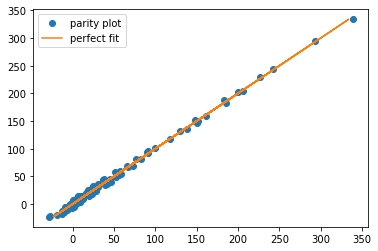

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from   scipy.optimize import minimize

#-----------------------------------
# SETUP
#-----------------------------------

# GENERATE DATA TO FIT
x=np.random.uniform(-10,10,(100,2))
x_train=x
print(x.shape)
pe=np.random.uniform(-3,3,(6,))
y_train = pe[0]*x[:,0]**2 + pe[1]*x[:,0]*x[:,1] +pe[2]*x[:,1]**2 + pe[3]*x[:,0] + pe[4]*x[:,1] + pe[5] 
y_train += 0.04*np.random.uniform(np.min(y_train),np.max(y_train),size=len(x))
print("EXACT PARAMETERS:",pe)

# # PLOT THE FIGURE
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y_train, c = 'b', marker='o')
plt.show()

# #MODEL (3 parameter model) p=(p0,p1,p2)
def m(x,p):
    return p[0]*x[:,0]**2 + p[1]*x[:,0]*x[:,1] +p[2]*x[:,1]**2 + p[3]*x[:,0] + p[4]*x[:,1] + p[5]

# # LOSS FUNCTION (i.e FUNCTION TO MINIMIZE FOR BEST PARAMETERES)
def loss(p):
    y_pred=m(x_train,p); 
    rmse=(np.mean((y_train-y_pred)**2.0))*0.5
    return rmse

# #-----------------------------------
# # TRAIN: I.E MINIMIZE THE LOSS FUNCTION 
# # TO FIND OPTIMAL PARAMETERS
# #-----------------------------------

# # INITIAL GUESS FOR 3 PARAMETERS
p0=np.random.uniform(-1,1,size=6); #print("p0.shape=",p0.shape)

# TRAIN AND PRINT PARAMETER RESULT
res = minimize(loss, p0, method='BFGS', tol=1e-5)
popt=res.x
print("OPTIMAL PARAMETERS:",popt)

# PLOT THE FIGURE
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y_train, c = 'b', marker='o')
ax.scatter(x[:,0], x[:,1], m(x_train,popt), c = 'r', marker='o')
plt.show()


# Parity plot (line y_pred=y_data represents a perfect fit)
print("PARITY PLOT:")
fig, ax = plt.subplots()
ax.plot(m(x_train,popt), y_train, 'o', label='parity plot')
ax.plot(y_train, y_train, '-', label='perfect fit')
ax.legend()
plt.show()
